Note: "Platform" and "Age Group" columns were added based on secondary research from online sources (e.g., social media trends, blogs, cultural behavior patterns). Google Trends does not provide demographic data

In [35]:
import pandas as pd

# Lookup dictionaries
platform_lookup = {
    'Coquette': 'TikTok',
    'Grunge': 'Tumblr, TikTok',
    'Y2K': 'TikTok, Instagram',
    'Balletcore': 'Pinterest, Instagram',
    'Old Money': 'Instagram, YouTube',
    'Clean Girl': 'TikTok, YouTube',
    'Cottagecore': 'Pinterest, Tumblr'
}

age_group_lookup = {
    'Coquette': '16–22',
    'Grunge': '17–25',
    'Y2K': '14–20',
    'Balletcore': '15–23',
    'Old Money': '18–28',
    'Clean Girl': '17–25',
    'Cottagecore': '16–24'
}

# Cleaner function to standardize all trend CSVs
def clean_trend_csv(file_name, aesthetic, keyword, color, description):
    df = pd.read_csv(file_name, skiprows=2)  # Skip top rows
    df.columns = ['Month', 'Search Score']  # Standardize columns

    # Add metadata
    df['Aesthetic'] = aesthetic
    df['Trending Keyword'] = keyword
    df['Dominant Color'] = color
    df['Description'] = description
    df['Platform'] = platform_lookup.get(aesthetic, 'Unknown')
    df['Age Group'] = age_group_lookup.get(aesthetic, 'Unknown')

    # Reorder columns
    return df[['Month', 'Aesthetic', 'Trending Keyword', 'Search Score',
               'Dominant Color', 'Description', 'Platform', 'Age Group']]



In [36]:
df_coquette = clean_trend_csv("coquette aesthetic.csv", "Coquette", "Coquette Aesthetic", "#f6dbe3", "Pale pink, bows, laces, femininity")
df_grunge = clean_trend_csv("grunge aesthetic.csv", "Grunge", "Grunge Aesthetic", "#2b2b2b", "Dark tones, ripped layers, edgy style")
df_balletcore = clean_trend_csv("balletcore aesthetic.csv", "Balletcore", "Balletcore", "#f2e8e0", "Delicate, airy, ballet-inspired")
df_y2k = clean_trend_csv("Y2K outfit.csv", "Y2K", "Y2K Outfit", "#ffb6c1", "Glossy lips, bold colors, retro vibe")
df_clean = clean_trend_csv("clean girl makeup.csv", "Clean Girl", "Clean Girl Makeup", "#f5f5f5", "Glowy skin, slick hair, minimal")
df_cottagecore = clean_trend_csv("cottagecore aesthetic.csv", "Cottagecore", "Cottagecore Aesthetic", "#d4e6d3", "Floral, soft, rural-inspired")
df_oldmoney = clean_trend_csv("old money aesthetic.csv", "Old Money", "Old Money Aesthetic", "#d0cfcf", "Neutral tones, luxury, understated class")


In [37]:
trend_df = pd.concat([
    df_coquette, df_grunge, df_balletcore, df_y2k,
    df_clean, df_cottagecore, df_oldmoney
], ignore_index=True)

trend_df.head()


,Month,Aesthetic,Trending Keyword,Search Score,Dominant Color,Description,Platform,Age Group
0,2020-06-07,Coquette,Coquette Aesthetic,0,#f6dbe3,"Pale pink, bows, laces, femininity",TikTok,16–22
1,2020-06-14,Coquette,Coquette Aesthetic,0,#f6dbe3,"Pale pink, bows, laces, femininity",TikTok,16–22
2,2020-06-21,Coquette,Coquette Aesthetic,0,#f6dbe3,"Pale pink, bows, laces, femininity",TikTok,16–22
3,2020-06-28,Coquette,Coquette Aesthetic,0,#f6dbe3,"Pale pink, bows, laces, femininity",TikTok,16–22
4,2020-07-05,Coquette,Coquette Aesthetic,0,#f6dbe3,"Pale pink, bows, laces, femininity",TikTok,16–22


Seasonality Analysis of Aesthetic
..
 Are trends affected by seasons?

cleaned dataset (already has Month, Search Score, and Aesthetic)

Convert the Month column to actual seasons (like Summer, Fall, etc.)

Group by Season + Aesthetic → average Search Score

Plot it



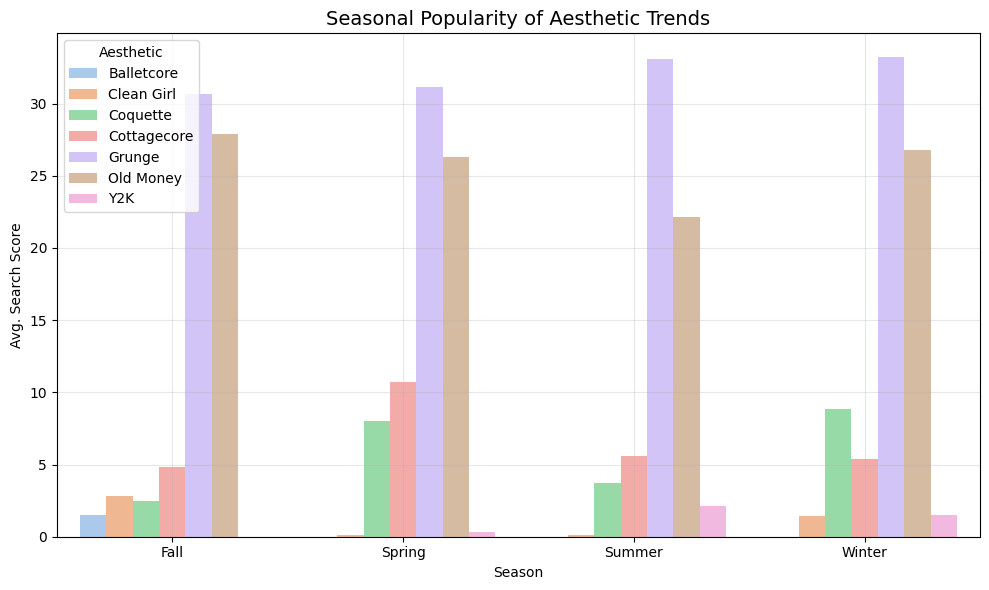

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 1: Load your cleaned dataset
df = trend_df  # Replace with your actual file name

# STEP 2: Convert Month to datetime
df['Month'] = pd.to_datetime(df['Month'])

# STEP 3: Map months to seasons
def month_to_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

df['Season'] = df['Month'].dt.month.map(month_to_season)

# STEP 4: Group and average
seasonal_trends = df.groupby(['Aesthetic', 'Season'])['Search Score'].mean().reset_index()

# STEP 5: Plot it
plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_trends, x='Season', y='Search Score', hue='Aesthetic', palette='pastel')
plt.title('Seasonal Popularity of Aesthetic Trends', fontsize=14)
plt.ylabel('Avg. Search Score')
plt.xlabel('Season')
plt.grid(True, alpha=0.3)
plt.legend(title='Aesthetic')
plt.tight_layout()
plt.show()


for custom colors


In [40]:
custom_colors = {
    'Coquette': '#F796A5',
    'Grunge': '#14115A',
    'Y2K': '#AE0579',
    'Balletcore': '#EFC3CA',
    'Old Money': '#F2DEC3',
    'Clean Girl': '#F2EBEA',
    'Cottagecore': '#84B678'
}


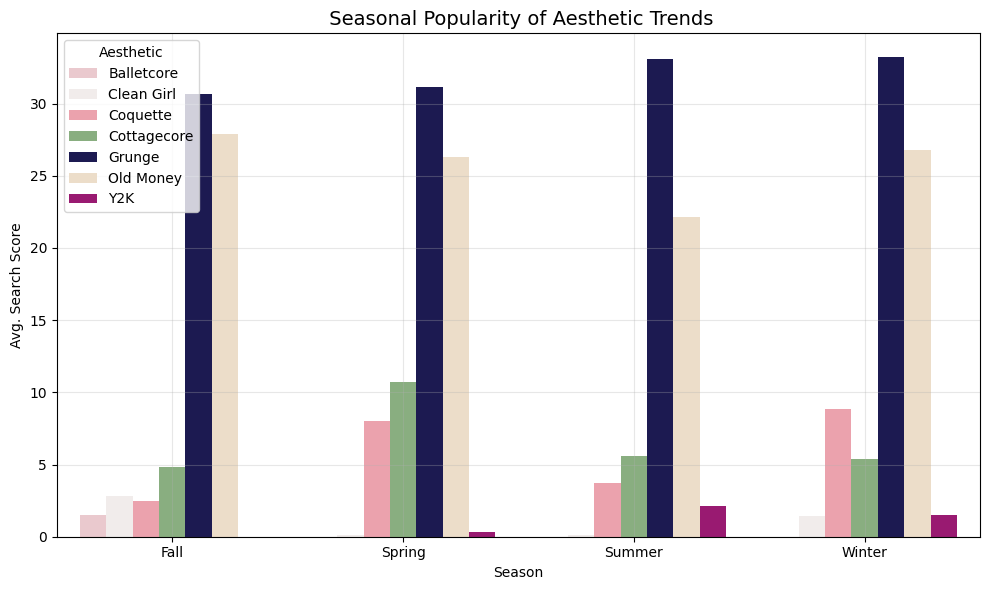

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=seasonal_trends,
    x='Season',
    y='Search Score',
    hue='Aesthetic',
    palette=custom_colors
)
plt.title(' Seasonal Popularity of Aesthetic Trends', fontsize=14)
plt.ylabel('Avg. Search Score')
plt.xlabel('Season')
plt.grid(True, alpha=0.3)
plt.legend(title='Aesthetic')
plt.tight_layout()
plt.show()


 Which age groups and platforms drive the most popular aesthetic trends?

age

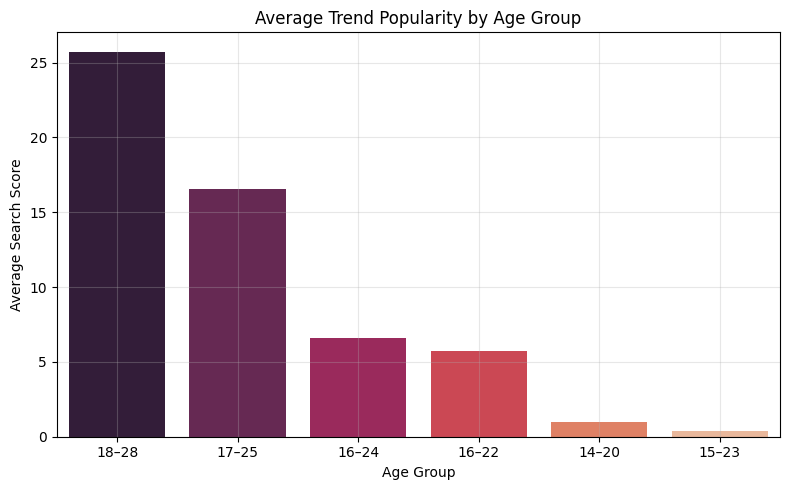

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group and calculate mean search score per age group
age_trend = df.groupby('Age Group')['Search Score'].mean().reset_index().sort_values(by='Search Score', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=age_trend, x='Age Group', y='Search Score', hue='Age Group', palette='rocket', legend=False)
plt.title('Average Trend Popularity by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Search Score')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


platform

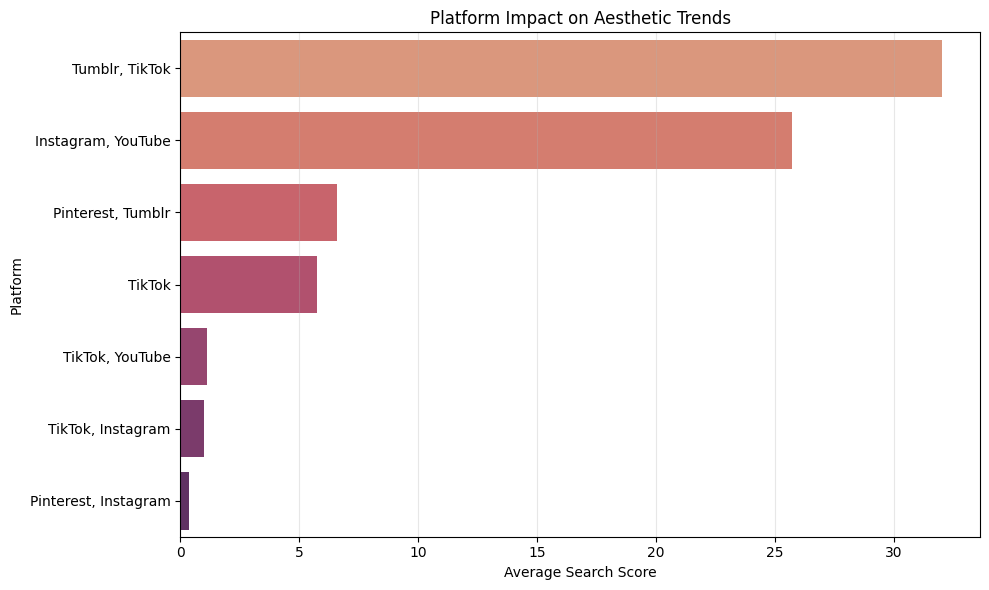

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=platform_trend,
    y='Platform',
    x='Search Score',
    palette='flare',
    hue='Platform',
    legend=False
)
plt.title("Platform Impact on Aesthetic Trends")
plt.xlabel("Average Search Score")
plt.ylabel("Platform")
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()



q3:
Predict the popularity of a fashion aesthetic trend, based on when, where, and who is driving it.
using regression random forest.
..
If a new “Old Money” aesthetic pops up on TikTok in July, how well will it perform?

 Do aesthetics launched on Instagram usually trend better than Pinterest?

 Does the season/month have an effect on score (e.g., balletcore in spring)?

In [44]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Make a copy of your final dataframe
ml_df = df.copy()

# Convert Month to datetime
ml_df['Month'] = pd.to_datetime(ml_df['Month'], errors='coerce')

# Drop NaT rows if any
ml_df = ml_df.dropna(subset=['Month'])

# Create numeric month for season info
ml_df['Month_Num'] = ml_df['Month'].dt.month

# Label encode categorical columns
le = LabelEncoder()
for col in ['Aesthetic', 'Platform', 'Age Group']:
    ml_df[col] = le.fit_transform(ml_df[col])


In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Features and target
X = ml_df[['Aesthetic', 'Platform', 'Age Group', 'Month_Num']]
y = ml_df['Search Score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prediction and evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(" Model Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")


 Model Evaluation:
Mean Squared Error: 366.43
R-squared Score: 0.29


/tmp/ipython-input-46-2808517418.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_importance, x='Importance', y='Feature', palette='magma')
/tmp/ipython-input-46-2808517418.py:12: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


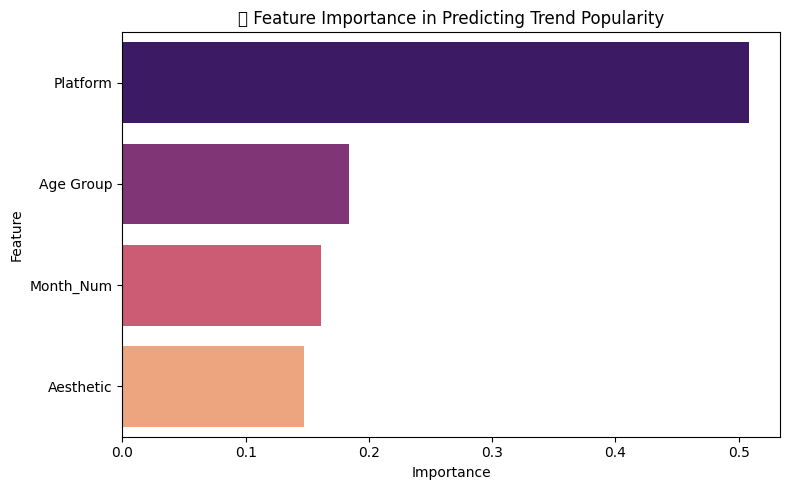

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

feat_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=feat_importance, x='Importance', y='Feature', palette='magma')
plt.title("💡 Feature Importance in Predicting Trend Popularity")
plt.tight_layout()
plt.show()


In [47]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results.head(10)


,Actual,Predicted
643,0,5.115292
332,60,33.585630
990,0,1.521875
538,0,5.115292
1810,28,27.303276
535,0,0.000000
425,28,35.028232
613,0,0.000000
1667,0,34.130580
1319,0,5.765678
